In [1]:
import sympy
import numpy as np
from sympy import Eq, plot_implicit, Matrix, plot, symbols, latex
from sympy.core import sympify
from sympy.geometry.point import Point, Point2D, Point3D
from sympy.geometry.line import Line
from sympy.core.symbol import _symbol
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from sympy.geometry.entity import GeometryEntity, GeometrySet
import matplotlib.pyplot as plt
from IPython.display import Math, Latex

# Практическое занятие 16
# Компьютерный практикум по алгебре на Python
## Кривые второго порядка на плоскости: парабола

### Задание 1
Определить класс parabola по образцу класса Гипербола из ЛР 15.

Реализовать **атрибуты**: 

**парамет**р $p$

**вершина** (vertex) в виде точки Point

**фокус** (focus) в виде точки Point

**угол angl**e по умолчанию 0 для параболы с осью, параллельной OX, 
а для параболы с осью, параллельной  OY angle = $\pi/2$

**ось симметрии** (axis_symmetry) в виде прямой Line

**директриса** (directrix) в виде прямой Line

Реализовать **методы** 

**equation(self)** - уравнение параболы,

**dir_equation(self)** - уравнение директрисы,

**ax_sym_equation(self**) - уравнение оси симметрии,

**rotate(self, angle)** - поворот на угол angle против часовой стрелки, метод не изменяет параболу, а возвращает параболу с теми же p и вершиной, но угол увеличен на angle по сравнению с исходной параболой. 

В конструкторе экземпляра класса  

__new__(cls, p, vertex=None, angle=None)

p - обязательный параметр, а вид параболы по умолчанию  - парабола с осью, параллельной оси OX,
вершина по умолчанию в начале координат.

In [2]:
class Parabola():
    def __init__(self, p, vertex=Point(0, 0), angle=0):
      self.__p = p
      self.__vertex = vertex
      self.__angle = angle
      
    @property
    def p(self):
      return(self.__p)

    @property
    def vertex(self):
      return(self.__vertex)

    @property
    def angle(self):
      return(self.__angle)
      
    @property
    def focus(self):
      F = Point(self.__p / 2, 0)
      return(Point(F.x * sympy.cos(self.angle) + self.vertex.x, F.x * sympy.sin(self.angle) + self.vertex.y))

    @property
    def axis_symmetry(self):
      return(sympy.Line(self.__vertex, self.focus))

    @property 
    def directrix(self):
      P1 = sympy.Point(-self.__p / 2, 0)
      P2 = sympy.Point(-self.__p / 2, 1)
      
      P1 = Point(P1.x * sympy.cos(self.angle) - P1.y * sympy.sin(self.angle) + self.vertex.x,
                 P1.x * sympy.sin(self.angle) + P1.y * sympy.cos(self.angle) + self.vertex.y)
      P2 = Point(P2.x * sympy.cos(self.angle) - P2.y * sympy.sin(self.angle) + self.vertex.x,
                 P2.x * sympy.sin(self.angle) + P2.y * sympy.cos(self.angle) + self.vertex.y)
      return(sympy.Line(P1, P2))

    def rotate(self, angle=0):
      return(Parabola(self.__p, angle=self.angle + angle, vertex=self.vertex))

    def equation(self):
      x, y = sympy.symbols('x y')
      x2 = (x - self.vertex.x) * sympy.cos(self.angle) + (y - self.vertex.y) * sympy.sin(self.angle)
      y2 = -(x - self.vertex.x) * sympy.sin(self.angle) + (y - self.vertex.y) * sympy.cos(self.angle)
      return(sympy.Eq(y2 ** 2, 2 * self.__p * x2))

    def ax_sym_equation(self):
      return(sympy.Eq(self.axis_symmetry.equation(x=sympy.Symbol('x'), y=sympy.Symbol('y')), 0))

    def dir_equation(self):
      return(sympy.Eq(self.directrix.equation(x=sympy.Symbol('x'), y=sympy.Symbol('y')), 0))

In [3]:
class MyParabola(Parabola):
    def __init__(this, p, vertex=Point(0, 0), angle=0):
      super().__init__(p, vertex, angle)
    
    def display(this):
      props = {
          'Параметр\ p': this.p, 'Вершина': this.vertex, 'Угол': this.angle, 'Фокус': this.focus, 
          'Ось симметрии': this.axis_symmetry, 'Директриса': this.directrix, 
          'Уравнение\ параболы': this.equation(), 'Уравнение\ оси\ симметрии': this.ax_sym_equation(), 'Уравнение\ директрисы': this.dir_equation(), 
      }
      display(*[Latex(f'{key}: {latex(props[key])}') for key in props.keys()])

    def draw(this, axis_symmetry=False, directrix=False, xlim=(-50, 50), ylim=(-50, 50), par_color='green', axis_symmetry_color='red', directrix_color='black', title=None):
      x, y = sympy.symbols('x y')
      xlim = (x, xlim[0], xlim[1])
      ylim = (y, ylim[0], ylim[1])

      p = plot_implicit(this.equation(), xlim, ylim, line_color=par_color, aspect_ratio=(1, 1), show=False, adaptive=False, title=title)
      if (axis_symmetry):
        p.extend(plot_implicit(this.ax_sym_equation(), xlim, ylim, line_color=axis_symmetry_color, aspect_ratio=(1, 1), show=False, adaptive=False))
      if (directrix):
        p.extend(plot_implicit(this.dir_equation(), xlim, ylim, line_color=directrix_color, aspect_ratio=(1, 1), show=False, adaptive=False))

      p.show()

    def rotate(this, angle=0):
      return(MyParabola(this.p, angle=this.angle + angle, vertex=this.vertex))

### Задание 2
Построить экземпляр класса Parabola - параболу с $p = 3$, вершиной в (-5, 2), осью симметрии, образующей угол $\pi/4$ с положительным направлением оси ОХ. Вывести на экран ее параметр p, вершину, угол, фокус, ось симметрии и директрису, а также уравнение параболы, оси симметрии и директрисы. 

Изобрзить на общем графике параболу, ее ось симметрии и директрису, парабола зеленая, ось симметрии красная, директриса черная. 

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

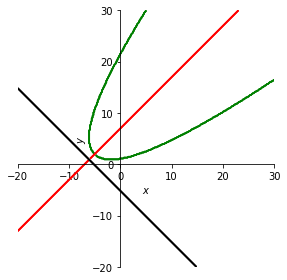

In [4]:
par = MyParabola(3, vertex=Point(-5, 2), angle=Pi / 4)
par.display()
par.draw(axis_symmetry=True, directrix=True, xlim=(-20, 30), ylim=(-20, 30), par_color='green', axis_symmetry_color='red', directrix_color='black')

### Индивидуальное задание
Построить экземпляр класса Parabola - параболу $x^{2} = 2py$ с заданным $p$, построить другую параболу путем поворота исходной параболы  на угол $\alpha$ радиан. Вывести на экран вершину, угол, фокус, ось симметрии и директрису обеих парабол. 

Использовать уравнения повернутой параболы, ее оси симметрии и директрисы для построения графиков в одной координатной плоскости. Парабола фиолетовая, ось симметрии зеленая, директриса черная, название графика Парабола, подписи осей $x$ и $y$.

Вариант N 2

Центр $Point2D\left(4, -4\right)$, парабола вида $y^{2} = 2px$ с $p = 4$. Угол поворота $\pi / 4$.

In [5]:
par = MyParabola(4, vertex=Point(4, -4))
par.display()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

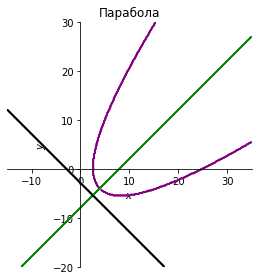

In [6]:
par2 = par.rotate(Pi / 4)
par.display()
par2.draw(axis_symmetry=True, directrix=True, xlim=(-15, 35), ylim=(-20, 30), par_color='purple', axis_symmetry_color='green', directrix_color='black', title='Парабола')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

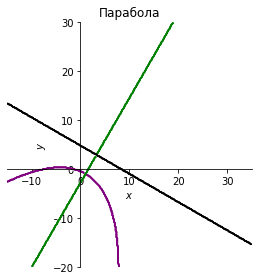

In [7]:
par = MyParabola(9, vertex=Point(1, -1)).rotate(Pi / 2)
par.display()
par2 = par.rotate(5 * Pi / 6)
par2.display()
par2.draw(axis_symmetry=True, directrix=True, xlim=(-15, 35), ylim=(-20, 30), par_color='purple', axis_symmetry_color='green', directrix_color='black', title='Парабола')